# Assignment 7 : Clustering - Crime data

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
df = pd.read_csv("crime_data.csv")

In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
df.rename(columns = {'Unnamed: 0':'State'}, inplace = True)


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

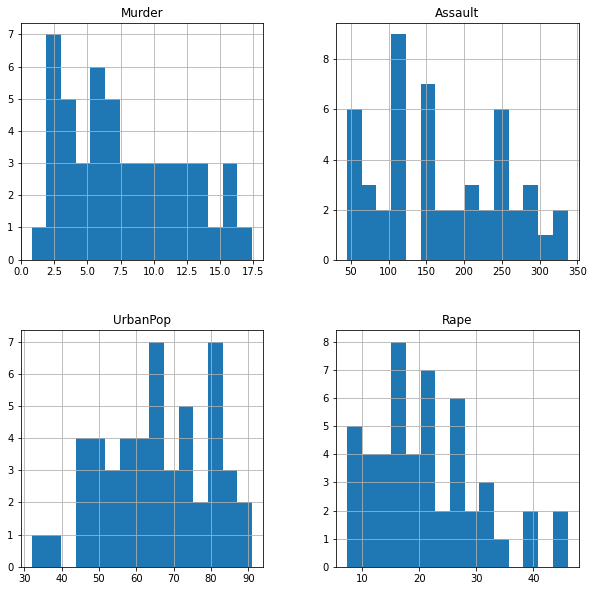

In [9]:
df.hist(bins=15,figsize=(10,10))

<AxesSubplot:xlabel='State'>

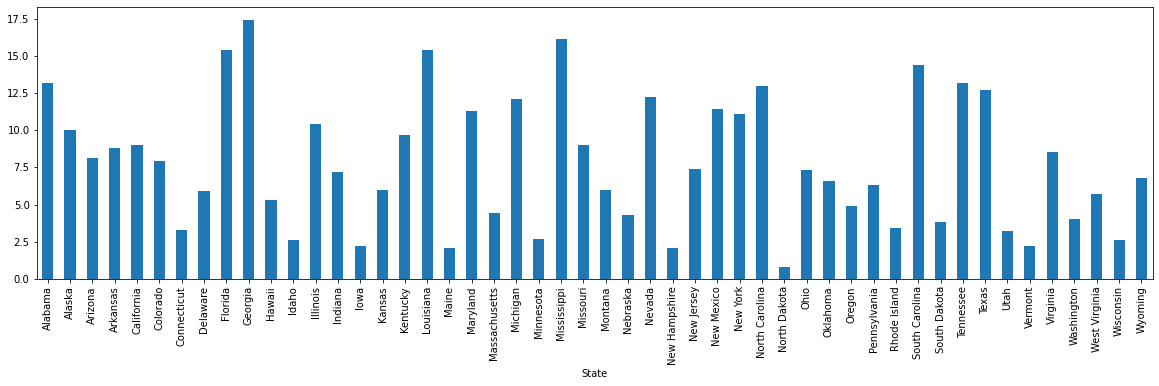

In [10]:
plt.figure(figsize=(20,5))
df.groupby('State')['Murder'].max().plot(kind='bar')

<AxesSubplot:xlabel='State'>

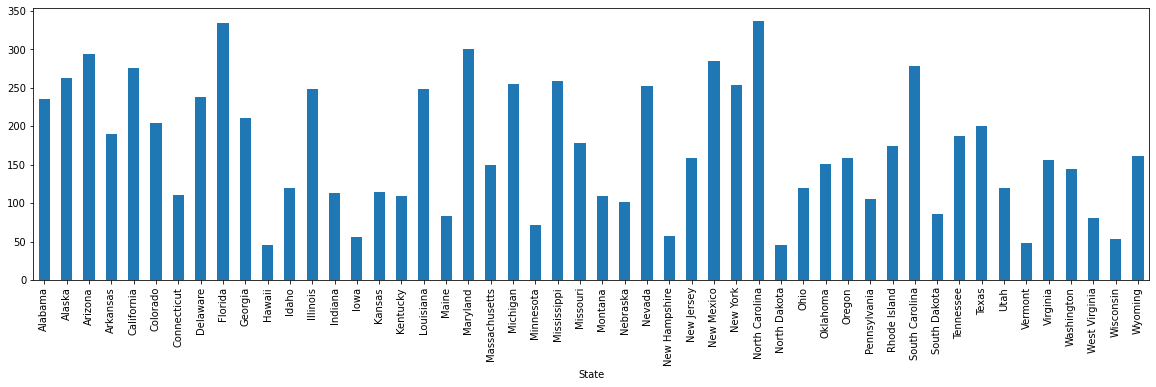

In [12]:
plt.figure(figsize=(20,5))
df.groupby('State')['Assault'].max().plot(kind='bar')

<AxesSubplot:xlabel='State'>

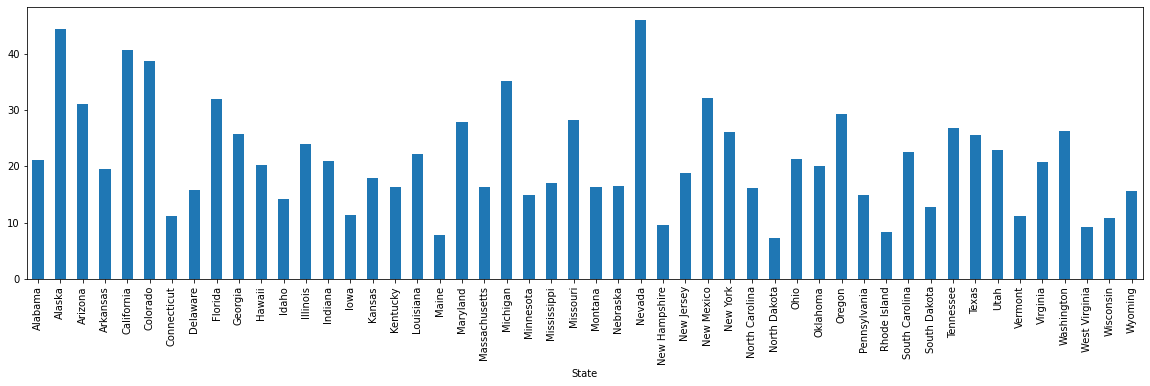

In [14]:
plt.figure(figsize=(20,5))
df.groupby('State')['Rape'].max().plot(kind='bar')

In [15]:
df.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


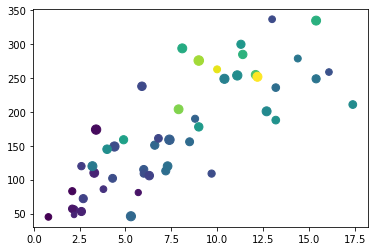

In [16]:
plt.scatter(df["Murder"],df["Assault"],df["UrbanPop"],df["Rape"])

In [17]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])

In [18]:
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [19]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(scaled_df)
#

KMeans(n_clusters=3, random_state=0)

In [22]:
df["Cluster"] = kmeans.predict(scaled_df)

In [23]:
df

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


# Elbow

In [24]:
kmeans.inertia_ #Within a cluster sum 0f square

80.08886132199619

In [25]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    dist = kmeans.inertia_
    wcss.append(dist)

In [26]:
wcss

[200.0,
 104.96163315756873,
 80.08886132199619,
 57.55425863091106,
 50.520265525350695,
 43.92746404497574,
 40.52183461131975,
 34.687388397849084,
 32.70648136388185,
 28.311639397122555]

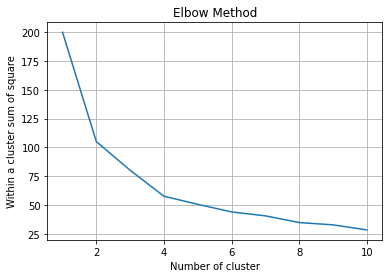

In [27]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Within a cluster sum of square")
plt.grid()

In [28]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [29]:
clusters_new.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [30]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [31]:
df

,State,Murder,Assault,UrbanPop,Rape,Cluster,clusterid_new
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,2,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,2,2
7,Delaware,5.9,238,72,15.8,2,2
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,1


In [32]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [33]:
df

,State,Murder,Assault,UrbanPop,Rape,Cluster,clusterid_new
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,2,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,2,2
7,Delaware,5.9,238,72,15.8,2,2
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,1


In [34]:
#What is avarage of top10 for cluster 1 = 86.6
df.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\ankit\AppData\Local\Temp\ipykernel_18200\1636051729.py:2: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape,Cluster
,,mean,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923,0.0
1,1,12.331579,259.315789,68.315789,29.215789,1.0
2,2,6.016667,143.888889,72.333333,19.344444,2.0


In [35]:
df[df['clusterid_new']==1]

,State,Murder,Assault,UrbanPop,Rape,Cluster,clusterid_new
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,1
12,Illinois,10.4,249,83,24.0,1,1
17,Louisiana,15.4,249,66,22.2,1,1
19,Maryland,11.3,300,67,27.8,1,1


In [36]:
df[df['clusterid_new']==0]

,State,Murder,Assault,UrbanPop,Rape,Cluster,clusterid_new
11,Idaho,2.6,120,54,14.2,0,0
14,Iowa,2.2,56,57,11.3,0,0
16,Kentucky,9.7,109,52,16.3,0,0
18,Maine,2.1,83,51,7.8,0,0
22,Minnesota,2.7,72,66,14.9,0,0
25,Montana,6.0,109,53,16.4,0,0
26,Nebraska,4.3,102,62,16.5,0,0
28,New Hampshire,2.1,57,56,9.5,0,0
33,North Dakota,0.8,45,44,7.3,0,0
40,South Dakota,3.8,86,45,12.8,0,0


In [37]:
df["clusterid_new"].value_counts()

1    19
2    18
0    13
Name: clusterid_new, dtype: int64

In [38]:
y = kmeans.predict(scaled_df)

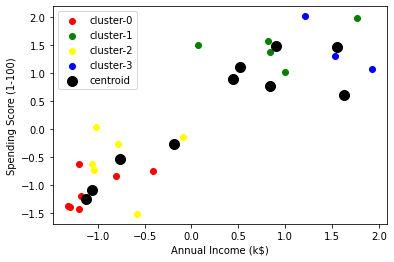

In [39]:
plt.scatter(scaled_df[y==0,0],scaled_df[y==0,1],label="cluster-0",color="red")
plt.scatter(scaled_df[y==1,0],scaled_df[y==1,1],label="cluster-1",color="green")
plt.scatter(scaled_df[y==2,0],scaled_df[y==2,1],label="cluster-2",color="yellow")
plt.scatter(scaled_df[y==3,0],scaled_df[y==3,1],label="cluster-3",color="blue")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,color="black",label="centroid")

plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()